In [61]:
import logging
import numpy as np

log_level = logging.INFO
LOGGER = logging.getLogger()
LOGGER.setLevel(log_level)
# sh = logging.StreamHandler()
# sh.setLevel(log_level)
# LOGGER.addHandler(sh)

In [141]:
# Exercise 1.10
def fair_coins(coins=1000, flips=10):
    """Run a computer simulation flipping 1,000 fair coins.

    Flip each coin independently 10 times. Let's focus on 3 coins as follows:
    c_1 is the first coin flipped. c_rand is a coin you choose at random.
    c_min is the coin that had the minimum frequency of heads (pick the eariler 
    one in case of a tie). Let v_1, v_rand, and v_min be the fraction of heads
    you obtain for the respective three coins.
    """
    coin_arr = np.random.binomial(1, 0.5, size=(coins, flips))
    c_1 = 0
    c_min = np.argmin(coin_arr.sum(axis=1))
    c_rand = 0
    while c_rand in {c_1, c_min}:
        c_rand = np.random.randint(len(coin_arr), high=None)
#     LOGGER.debug("c_1: %s", coin_arr[c_1])
    v_1 = coin_arr[c_1].sum() / flips
#     LOGGER.debug("c_min: %s", coin_arr[c_min])
    v_min = coin_arr[c_min].sum() / flips
#     LOGGER.debug("c_rand: %s", coin_arr[c_rand])
    v_rand = coin_arr[c_rand].sum() / flips
    return v_1, v_min, v_rand

def print_vs(*vs):
    print("""
    v_1: {:.4f}
    v_min: {:.4f}
    v_rand: {:.4f}
    """.format(*vs))
    
# What is mu for the 3 coins? It's always 50%, assuming a perfectly fair
# coin
print_vs(*fair_coins())


    v_1: 0.6000
    v_min: 0.1000
    v_rand: 0.8000
    


In [104]:
def large_trial(trials):
    results = np.empty((trials, 3))
    assert results.shape == (trials, 3)
    for i in range(trials):
        results[i] = fair_coins()
    return results
    
trials = 10**5
results = large_trial(trials)

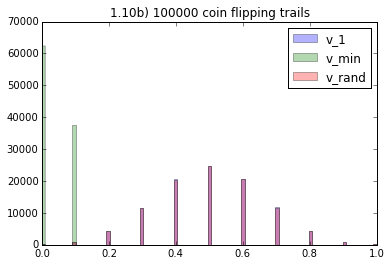


You may have a hard time seeing v_1 and v_rand; they tend to both show 
a normal distribution, and thus overlap.



In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
bins = np.linspace(0.0, 1.0, 100)
plt.hist(results[:, 0], bins, alpha=0.3, label='v_1')
plt.hist(results[:, 1], bins, alpha=0.3, label='v_min')
plt.hist(results[:, 2], bins, alpha=0.3, label='v_rand')
plt.legend(loc='upper right')
plt.title('1.10b) {:d} coin flipping trials'.format(trials))
plt.show()
print("""
You may have a hard time seeing v_1 and v_rand; they tend to both show 
a normal distribution, and thus overlap.
""")

In [106]:
def print_stats(title, vals):
    assert vals.shape == (3,), vals.shape
    print("""
    {title}
    {bar}
    v_1: {v1:.4f}
    v_min: {vmin:.4f}
    v_rand: {vrand:.4f}
    """.format(
        title=title,
        bar='='*len(title),
        v1=vals[0],
        vmin=vals[1],
        vrand=vals[2]))

averages = np.mean(results, axis=0)
assert averages.shape == (3,), averages.shape
print_stats('Averages', averages)
medians = np.median(results, axis=0)
print_stats('Medians', medians)


    Averages
    v_1: 0.5002
    v_min: 0.0377
    v_rand: 0.5007
    

    Medians
    v_1: 0.5000
    v_min: 0.0000
    v_rand: 0.5000
    


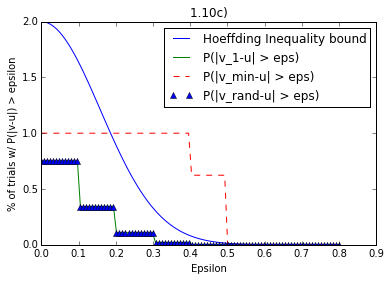

In [149]:
def hoeffding_inequality(eps, N):
    z = -2 * (eps**2) * N
    return 2 * np.exp(z)

# Hoeffding inequality plot
n_eps = 100
epsilons = np.linspace(.0, .8, n_eps)
h_ineq = hoeffding_inequality(epsilons, 10)
# print(y.min(), y.max())

mu = 0.5
# Calculate absolute difference between P_sample(heads) and P_true(heads)
diff = np.absolute(results-mu)
# Figure which coins had a difference from the true probability of heads
# greater than epsilon
P_gt_eps = np.empty((n_eps, 3))
# Compare the P(heads) of our K trials of N samples against epsilon
for i in range(n_eps):
    diff_eps = diff > epsilons[i]
    P_gt_eps[i] = np.mean(diff_eps, axis=0)
    
plt.title("1.10c) ")
plt.xlabel('Epsilon')
plt.ylabel('% of trials w/ P(|v-u|) > epsilon')
plt.plot(epsilons, h_ineq, label='Hoeffding Inequality bound')
plt.plot(epsilons, P_gt_eps[:, 0], label='P(|v_1-u| > eps)')
plt.plot(epsilons, P_gt_eps[:, 1], 'r--', label='P(|v_min-u| > eps)')
plt.plot(epsilons, P_gt_eps[:, 2], 'b^', label='P(|v_rand-u| > eps)')
plt.legend(loc='upper right')

1.10d) Which coins obey the Hoeffding Inequality, and which do not?

Both $v_{1}$ and $v_{rand}$ obey the bound given by the Hoeffding Inequality. As all coins will end up with similar flips over enough trials, they end up showing an identical plot. 

$v_{min}$ does _not_ obey the bound. It is the result of _maximizing_ in-sample error by selecting (one of) the worst-performing hypotheses in every round. We would see an identical plot if we'd selected the best-performing coin's performance, $v_{max}$, from each trial. The absolute difference from the out-of-sample error, $E_{out}$, for $v_{min}$ and $v_{max}$ would be equal.

1.10e) Relate 1.10d to sampling red and green marbles from multiple bins.